In [1]:
from google.colab import files

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip3 install catboost
!pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [5]:
url = 'https://raw.githubusercontent.com/Gladiator07/Harvestify/master/Data-processed/crop_recommendation.csv'
data = pd.read_csv(url)
target_col = 'label'
X = data.drop(target_col, axis=1)
y = data[target_col]


In [6]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.shape

(2200, 8)

In [8]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [9]:
# Step 2: Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64


In [10]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(2200,)
(1760,)
(440,)


In [12]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.transform(X)

Logistic Regression

In [14]:
LogReg_model = LogisticRegression(C=0.001, max_iter=200, penalty=None, solver='saga')

Accuracy and F1 Score on Training Data

In [15]:
# Train the model
LogReg_model.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = LogReg_model.predict(X_train_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate F1 score
train_f1_score = f1_score(y_train, y_train_pred, average='weighted') * 100

print(f"Accuracy (Train Set) of Logistic Regression Model: {train_accuracy:.2f}%")
print(f"F1 Score (Train Set) of Logistic Regression Model: {train_f1_score:.2f}%")

Accuracy (Train Set) of Logistic Regression Model: 99.09%
F1 Score (Train Set) of Logistic Regression Model: 99.09%


Accuracy and F1 Score on CV 5 Data

In [16]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(LogReg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(LogReg_model, X_train_scaled, y_train, cv=5, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (5-Fold Cross-Validation) of Logistic Regression Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (5-Fold Cross-Validation) of Logistic Regression Model: {mean_f1:.2f}%")

Mean Accuracy (5-Fold Cross-Validation) of Logistic Regression Model: 98.12%
Mean F1 Score (5-Fold Cross-Validation) of Logistic Regression Model: 98.09%


Accuracy and F1 Score on CV 10

In [17]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(LogReg_model, X_train_scaled, y_train, cv=10, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(LogReg_model, X_train_scaled, y_train, cv=10, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (10-Fold Cross-Validation) of Logistic Regression Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (10-Fold Cross-Validation) of Logistic Regression Model: {mean_f1:.2f}%")

Mean Accuracy (10-Fold Cross-Validation) of Logistic Regression Model: 98.18%
Mean F1 Score (10-Fold Cross-Validation) of Logistic Regression Model: 98.15%


Accuracy and F1 Score on Test Data

In [18]:
# Make predictions on the test data
y_test_pred = LogReg_model.predict(X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

print(f"Accuracy (Test Set) of Logistic Regression Model: {test_accuracy:.2f}%")
print(f"F1 Score (Test Set) of Logistic Regression Model: {f1:.2f}%")



Accuracy (Test Set) of Logistic Regression Model: 97.05%
F1 Score (Test Set) of Logistic Regression Model: 97.04%


Sample prediction

In [25]:
n = 1203

sample_record = X_train_scaled[n]

# changing the input_data to a numpy array
sample_record = np.asarray(sample_record)

# reshape the np array as we are predicting for one instance
sample_record = sample_record.reshape(1,-1)

prediction = LogReg_model.predict(sample_record)
print(prediction)
print(y_train.iloc[n])

['coffee']
coffee


In [24]:
from sklearn.metrics import accuracy_score

# Predict using the trained model
y_pred = LogReg_model.predict(X_scaled)

# Flatten y_pred to make it 1-dimensional
y_pred = y_pred.flatten()

# Convert y_pred to a pandas Series with the same shape as y
import pandas as pd
y_pred_series = pd.Series(y_pred, index=y.index)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_series)

print("Accuracy:", accuracy)

# Calculate the number of misclassified cases
misclassified_cases = len(y) - int(accuracy * len(y))

print("Number of misclassified cases:", misclassified_cases)
print("Total number of instances:", len(y))

# Find and print the misclassified rows
misclassified_indices = y.index[y != y_pred_series]
misclassified_rows = X.iloc[misclassified_indices]  # Assuming X is a DataFrame containing your feature data





Accuracy: 0.9868181818181818
Number of misclassified cases: 29
Total number of instances: 2200


Confusion Matrix:


<Axes: >

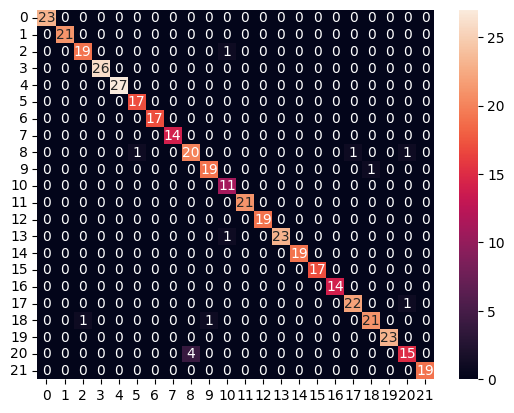

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)

In [22]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    